In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train = np.loadtxt("X_train.txt")
y_train = np.loadtxt("y_train.txt").astype(int)

X_test = np.loadtxt("X_test.txt")
y_test = np.loadtxt("y_test.txt").astype(int)

1. Write a function to merge training and testing numpy arrays together as we are going to do unsupervised learning and we don't need separate data

In [ ]:
# Solution
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])

2. Write a code to transform the data using PCA  to cover the 80% of the variance of the original (scaled) data?

In [ ]:
# Solution
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.8, random_state=123).fit(X_scaled)
X_pca = pca.transform(X_scaled)

3. How many principal components cover 80% of the variance in data?

In [ ]:
# Solution
X_pca.shape[1]

27

4. What percentage of the variance is covered by the top 3 principal components?

In [ ]:
# Solution
total_var = 0.0
for i in range (0, 3):
  total_var += round(float(pca.explained_variance_ratio_[i] * 100))
print(total_var)

60.0


5. Write a code to visualize data on a 2-D plot

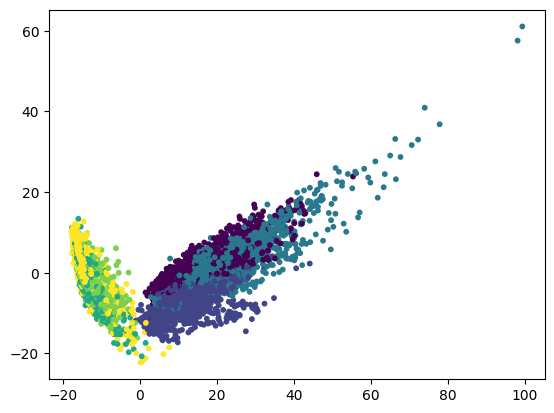

In [ ]:
# Solution
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=10);

6. Perform k-means clustering and plot SSE to find out the optimal number of clusters

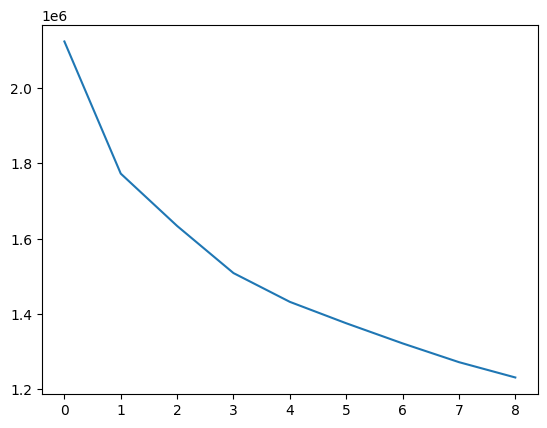

In [ ]:
# Solution
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca)

    ssd.append(kmeans.inertia_)

plt.plot(ssd)

Remember that each label in y represents
* 1 - WALKING
* 2 - WALKING_UPSTAIRS
* 3 - WALKING_DOWNSTAIRS
* 4 - SITTING
* 5 - STANDING
* 6 - LAYING

7. Calculate the SSE for 6 clusters using k-means

In [ ]:
# Solution
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_pca)
print(kmeans.inertia_)

1432221.9223633567


8. Compare the Silhouette score of k-means and Agglomerative clustering

In [ ]:
# Solution
ag = AgglomerativeClustering(n_clusters=6, linkage="ward").fit(X_pca)

print("K-means: ", silhouette_score(X_pca, kmeans.labels_, metric='euclidean'))
print("Hierarchical: ", silhouette_score(X_pca, ag.labels_, metric='euclidean'))

K-means:  0.18781582776792055
Hierarchical:  0.1743240043954723


9. Perform DBSCAN clustering with <i>epsilon</i>=10 and <i>min_samples</i>=5

In [ ]:
# Solution
dbscan = DBSCAN(eps=10, min_samples=5)
dbscan.fit(X_pca)

DBSCAN(eps=10)

10. Compare the silhoutte score of DBSCAN with earlier clustering methods.

In [ ]:
# Solution
silhouette_avg = silhouette_score(X_pca, dbscan.labels_)
print(silhouette_avg)

0.19367253514821117
